# K-nearest Neighbors Algorithm

K-nearest Neighbors(KNN) algorithm is the simple and powerful supervised machine learning algorithm that is useful for classification and regression tasks.
In this notebook --
- the demonstration of KNN with different toy datasets
- the manual implementation of KNN
- the visualization of how the new data is classify by the voting of the nearest k-negihbors are explained.

### 01. Importing python libraries and preparing the toy datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns

# seaborn scatterplot
sns.set_style("darkgrid")
colors = ['#1db954', '#b91d7a']

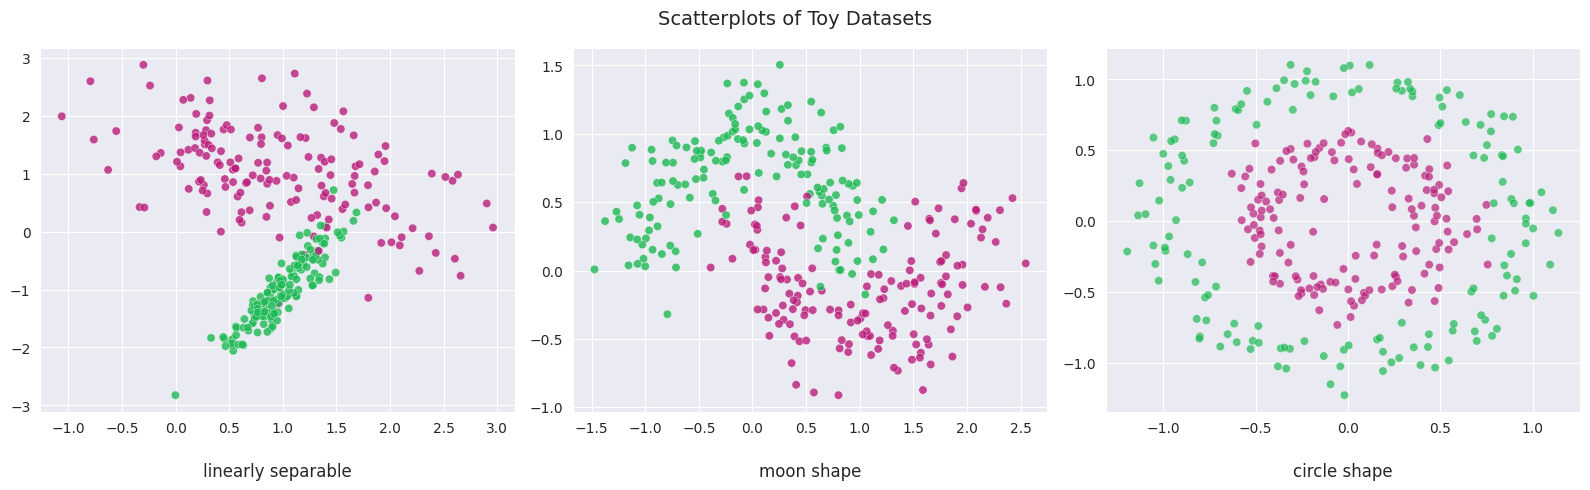

In [2]:
# creating toy datasets
from sklearn.datasets import make_classification
X_class, y_class = make_classification(n_samples = 300, n_features = 2,
                           n_informative = 2, n_redundant = 0,
                           n_clusters_per_class = 1, random_state = 42)

from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)

from sklearn.datasets import make_circles
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)


# subplots for the visualization of toy datasets
fig, ax = plt.subplots(1, 3, figsize=(16,5))
sns.scatterplot(x=X_class[:,0], y=X_class[:,1], hue=y_class, ax=ax[0], marker='o', linewidth=0.3, alpha=0.8, palette=colors)
ax[0].set_title("linearly separable", y=-0.2)

sns.scatterplot(x=X_moons[:,0], y=X_moons[:,1], hue=y_moons, ax=ax[1], marker='o', linewidth=0.3, alpha=0.8, palette=colors)
ax[1].set_title("moon shape", y=-0.2)

sns.scatterplot(x=X_circles[:,0], y=X_circles[:,1], hue=y_circles, ax=ax[2], marker='o', linewidth=0.3, alpha=0.7, palette=colors)
ax[2].set_title("circle shape", y=-0.2)

for ax in ax:
    ax.legend_.remove()

fig.suptitle("Scatterplots of Toy Datasets", fontsize=14)
plt.tight_layout()
plt.show()

### 02. Implementation of KNN using python scikit-learn library

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=27)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediction
predictions = knn.predict(X_test)
print("predictions: ", predictions)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

predictions:  [0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1]
Accuracy: 0.9666666666666667


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.3, random_state=27)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediction
predictions = knn.predict(X_test)
print("predictions: ", predictions)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

predictions:  [1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1]
Accuracy: 0.9555555555555556


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3, random_state=27)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediction
predictions = knn.predict(X_test)
print("predictions: ", predictions)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

predictions:  [1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1]
Accuracy: 0.9888888888888889


### 03. Manual implementation of KNN

### Manual Implementation of KNN

Here, we implement the K-nearest Neighbors algorithm manually using Python and NumPy.

`knn_classifier(n)`: `n` represents the number of neighbors (`k`) to consider for classification.

`__euclidean__(self, x)`: We use euclidean method for calculating distance
between the new data points `x` and the training points `self.X_train`. It returns an array of distances.

<p>Eudlidean Distance:</p>
<p>$$ Distance = \sqrt{\sum(p - q)^2}$$</p>


`fit(self, X_train, y_train)`:
This method trains the KNN model by storing the training data (`X_train`) and their corresponding labels (`y_train`).

`predict(self, X_test, return_neighbors=False)`:
This method predicts the class labels for the given test data `X_test`.
- For each test point, it calculates the Euclidean distance to all training points using the `__euclidean__` method.
- It then finds the indices of the `n_neighbors` closest training points using `argsort()`.
- The predicted class for the test point is the mode (most frequent class) among the labels of these `n_neighbors`.
- If `return_neighbors` is set to `True`, it also returns the indices of the `k` nearest neighbors for each test point. This is for the visualization of the process later.

`visualize(self, X_test, y_test, neighbors_indices, ax=None)`:
This method visualizes the KNN classification process.
- It plots the original training data points, colored by their class.
- It plots the new test points, also colored by their predicted class.
- It draws dashed lines connecting each test point to its `k` nearest neighbors in the training data, illustrating which points influenced the classification.

In [32]:
class knn_classifier():
    def __init__(self, n):
        self.n_neighbors = n

    # eculidean method for calculating distance
    # sqrt(sum((X - x)^2))
    def __euclidean__(self, x):
        return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test, return_neighbors=False):
        y_predict = []
        y_neighbors = []

        for x in X_test:
            neighbors = self.__euclidean__(x)
            knn_n = neighbors.argsort()[:self.n_neighbors]    # argsort() return the indices of minimum sorted numbers
            if return_neighbors:
                y_neighbors.append(knn_n)

            # Check if there are enough neighbors before calculating the mode
            if len(knn_n) > 0:
                y_predict.append(mode(y_train[knn_n])[0])         # predicition is the class of the most voted one
            else:
                y_predict.append(np.random.choice(self.y_train)) # Handle cases with no neighbors (shouldn't happen with sufficient data)


        if return_neighbors:
            return np.array(y_predict), y_neighbors

        return np.array(y_predict)

    def visualize(self, X_test, y_test, neighbors_indices, ax=None):
        # plot the dataset
        sns.scatterplot(x=self.X_train[:,0], y=self.X_train[:,1],
                        hue=self.y_train, ax=ax,
                        linewidth=0.3, alpha=0.8,
                        palette={0: colors[0], 1: colors[1]},
                        zorder=1)

        # plot new test points
        sns.scatterplot(x=X_test[:,0], y=X_test[:,1],
                        hue=y_test, ax=ax,
                        edgecolor='#791350',
                        marker='o',
                        s=100, alpha=0.9,
                        palette={0: colors[0], 1: colors[1]},
                        zorder=2)

        # connect the new points with their k-nearest neighbors
        for i, indices in enumerate(neighbors_indices):
            x0, y0 = X_test[i]
            for neighbor_index in indices:
                x1, y1 = self.X_train[neighbor_index]
                if ax:
                    ax.plot([x0, x1], [y0 ,y1], 'k--', alpha=0.7, linewidth=0.5, zorder=1)
                else:
                    plt.plot([x0, x1], [y0 ,y1], 'k--', alpha=0.7, linewidth=0.5, zorder=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.3, random_state=27)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediction
predictions = knn.predict(X_test)
print("sklearn predictions: ", predictions)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}\n")

knn_manual = knn_classifier(5)
knn_manual.fit(X_train, y_train)

# prediction
predictions = knn_manual.predict(X_test)
print("knn-manual predictions: ", predictions)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

sklearn predictions:  [1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1]
Accuracy: 0.9555555555555556

knn-manual predictions:  [1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1]
Accuracy: 0.9555555555555556


Accuracy: 1.0
Manual Accuracy: 0.8
scikit learn predictions:  [1 1 1 0 0]
sk learn Accuracy: 0.8
new points: [1 1 1 1 0]
Accuracy: 1.0


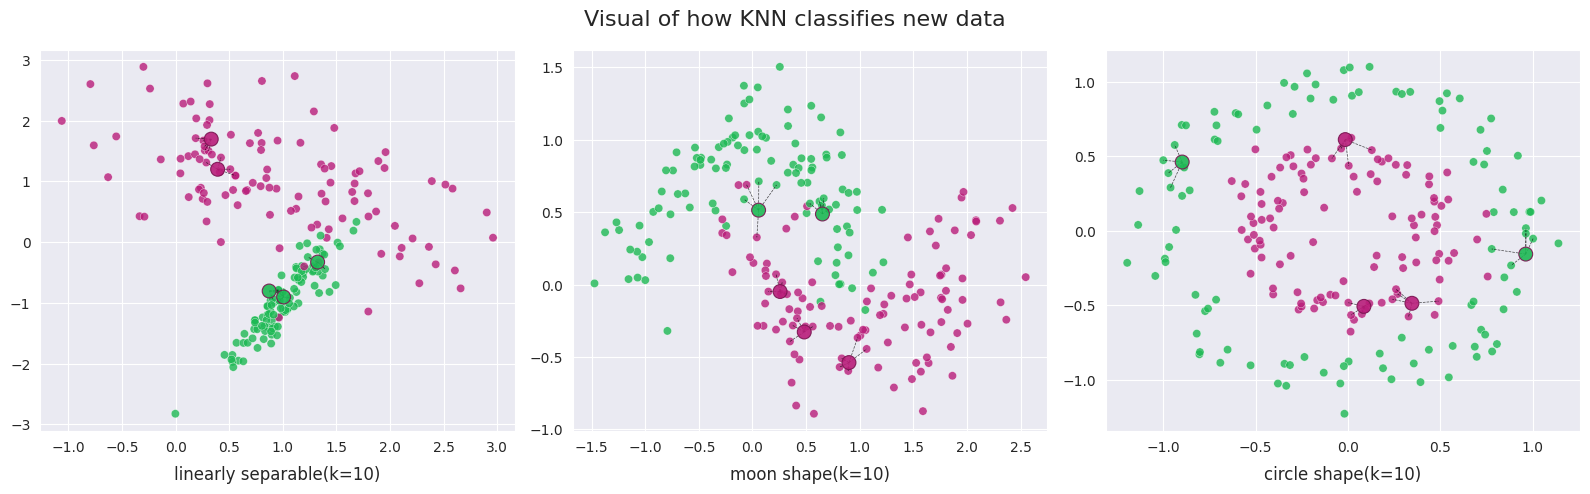

In [12]:
np.random.seed(27)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
k = 5    # number of nearest neighbors
titles = ['linearly separable(k=10)', 'moon shape(k=10)', 'circle shape(k=10)']

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3)

# selecting random points from the test data after the split
indices = np.random.choice(len(X_test), 5)
new_points = X_test[indices]
new_points_actual = y_test[indices]

knn = knn_classifier(k)
knn.fit(X_train, y_train)
predictions, neighbors = knn.predict(new_points, return_neighbors=True)
knn.visualize(new_points, predictions, neighbors, ax=axes[0])
accuracy = accuracy_score(new_points_actual, predictions)
print(f"Accuracy: {accuracy}")

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.3)
new_points = X_test[indices]
new_points_actual = y_test[indices]
knn = knn_classifier(k)
knn.fit(X_train, y_train)
predictions, neighbors = knn.predict(new_points, return_neighbors=True)
knn.visualize(new_points, predictions, neighbors, ax=axes[1])
accuracy = accuracy_score(new_points_actual, predictions)
print(f"Manual Accuracy: {accuracy}")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediction
predictions = knn.predict(new_points)
print("scikit learn predictions: ", predictions)
accuracy = accuracy_score(new_points_actual, predictions)
print(f"sk learn Accuracy: {accuracy}")
print("new points:", new_points_actual)


X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3)
new_points = X_test[indices]
new_points_actual = y_test[indices]
knn = knn_classifier(k)
knn.fit(X_train, y_train)
predictions, neighbors = knn.predict(new_points, return_neighbors=True)
knn.visualize(new_points, predictions, neighbors, ax=axes[2])
accuracy = accuracy_score(new_points_actual, predictions)
print(f"Accuracy: {accuracy}")

for i in range(len(axes)):
    axes[i].legend().remove()
    axes[i].set_title(titles[i], y=-0.15)

plt.suptitle("Visual of how KNN classifies new data", fontsize=16)
plt.tight_layout()
plt.savefig("KNN Visual1.png")
plt.show()

In the above plots, we can see that the new data is classify by the voting of nearest k neighbors.

### 05. Underfitting vs. Overfitting (Bias and Variance Trade Off)

What is underfitting vs overfitting? <br/>
The choice of the number of neighbors (k) in the KNN algorithm has a significant impact on the model's performance and can lead to either underfitting or overfitting.

**Underfitting**: This occurs when the model is too simple and cannot capture the underlying patterns in the data. In KNN, a large value of k leads to a smoother decision boundary as the prediction for a new data point is influenced by a larger number of neighbors. This can cause the model to underfit, especially on complex datasets with non-linear boundaries, as seen in the plot with a large k value (e.g., k=45) for the 'moon shape' or 'circle shape' datasets. The model fails to capture the intricate structure of the data.

**Overfitting**: This happens when the model is too complex and learns the training data, including noise and outliers, too well. With a small value of k, the decision boundary is highly influenced by individual data points, resulting in a more complex and jagged boundary. This can lead to overfitting, where the model performs very well on the training data but poorly on unseen data. The plot with a small k value (e.g., k=5) demonstrates this, showing a decision boundary that is too tailored to the specific training points.

The goal is to find an optimal k value that strikes a balance between underfitting and overfitting, leading to a model that generalizes well to new data. This is a manifestation of the bias-variance trade-off. A large k increases bias and decreases variance, while a small k decreases bias but increases variance.


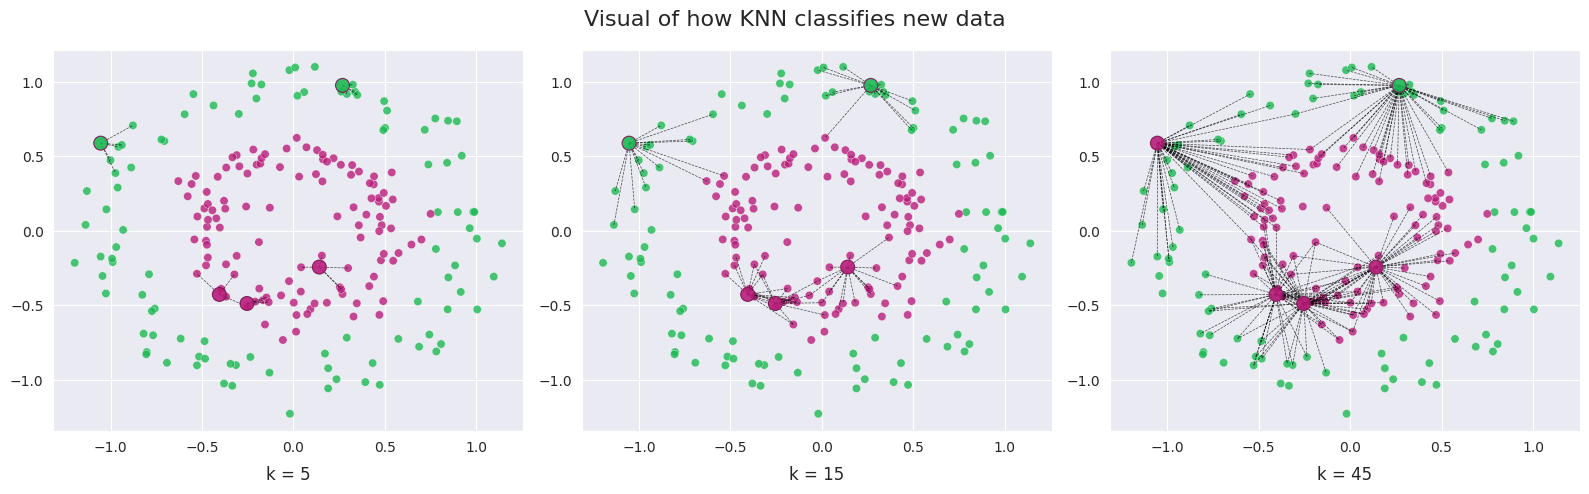

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3, random_state=27)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

n_counts = [5, 15, 45]

for i, n in enumerate(n_counts):
    knn = knn_classifier(n)
    knn.fit(X_train, y_train)
    predictions, neighbors = knn.predict(new_points, return_neighbors=True)
    knn.visualize(new_points, predictions, neighbors, ax=axes[i])

for i, ax in enumerate(axes):
    ax.set_title(f"k = {n_counts[i]}", y = -0.15)
    ax.legend().remove()



plt.suptitle("Visual of how KNN classifies new data", fontsize=16)
plt.tight_layout()
plt.savefig("KNN Visual1.png")
plt.show()

We can see in the plots that as the `k` increases, the prediction is biased towards the majority of the data points nearby.

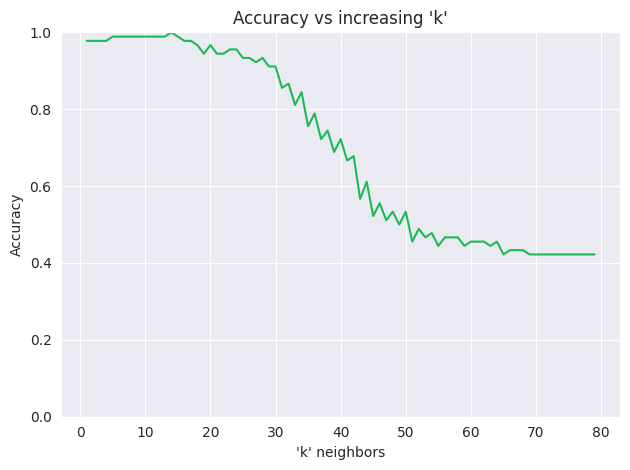

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3, random_state=27)

accuracy_list = []
for i in range(1, 80):
  model = KNeighborsClassifier(i)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracy_list.append(accuracy)

k = [x for x in range(1, 80)]
fig, ax = plt.subplots()
ax.plot(k, accuracy_list, color=colors[0])
ax.set_ylim(0, 1)
ax.set_xlabel("'k' neighbors")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs increasing 'k'")
plt.tight_layout()
plt.show()

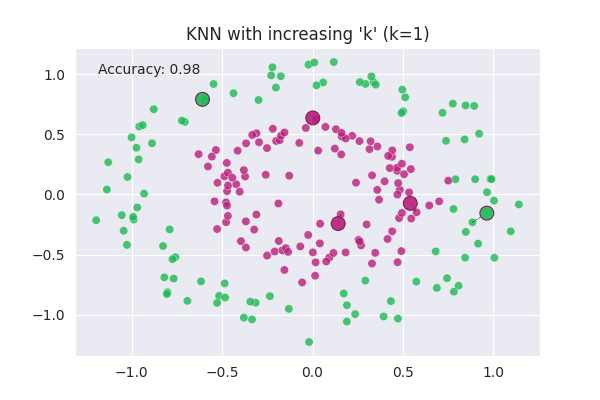

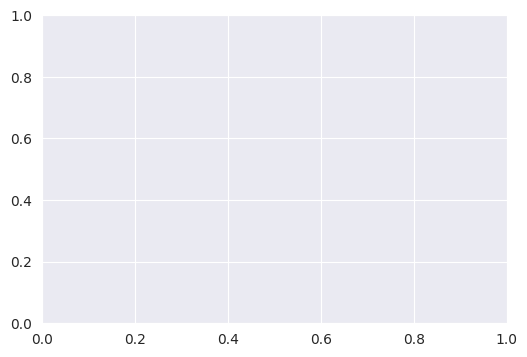

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume X_circles and y_circles are defined from previous cells
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3, random_state=27)

# Select a smaller subset of test points for visualization
np.random.seed(27)
indices = np.random.choice(len(X_test), 5, replace=False)
new_points_viz = X_test[indices]
new_points_actual_viz = y_test[indices]


fig, ax = plt.subplots(figsize=(6,4))

def init():
    ax.clear()
    return []

def update(n):
    ax.clear()
    model = knn_classifier(n+1) # Use n+1 as frames start from 0
    model.fit(X_train, y_train)

    # Predict and calculate accuracy on the entire test set
    predictions_full = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions_full)

    # Predict and get neighbors for the visualization subset
    predictions_viz, neighbors_viz = model.predict(new_points_viz, return_neighbors=True)

    model.visualize(new_points_viz, predictions_viz, neighbors_viz, ax=ax)
    ax.set_title(f"KNN with increasing 'k' (k={n+1})")
    ax.text(0.05, 0.95, f"Accuracy: {accuracy:.2f}", transform=ax.transAxes, fontsize=10, verticalalignment='top')
    ax.legend().remove()
    return []

# Animate for k from 1 to 80
ani = animation.FuncAnimation(fig, update, frames=80, init_func=init, blit=False, repeat=False)

ani.save("knn_animation.gif", writer="pillow", fps=10)

from IPython.display import Image
Image(filename="knn_animation.gif")